
## Открытый курс по машинному обучению
Автор материала: программист-исследователь Mail.ru Group, старший преподаватель Факультета Компьютерных Наук ВШЭ Юрий Кашницкий. Материал распространяется на условиях лицензии [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/). Можно использовать в любых целях (редактировать, поправлять и брать за основу), кроме коммерческих, но с обязательным упоминанием автора материала.

# <center>Домашнее задание. <br> Анализ данных по доходу населения UCI Adult</center>

**В задании предлагается с помощью Pandas ответить на несколько вопросов по данным репозитория UCI [Adult](https://archive.ics.uci.edu/ml/datasets/Adult) (качать данные не надо – они уже есть в репозитории). Для отправки решений используйте [онлайн-форму](https://goo.gl/forms/pB1tDIArMvTUsIUg2).**

Уникальные значения признаков (больше информации по ссылке выше):
- age: continuous.
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- fnlwgt: continuous.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- education-num: continuous.
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- sex: Female, Male.
- capital-gain: continuous.
- capital-loss: continuous.
- hours-per-week: continuous.
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.   
- salary: >50K,<=50K

In [68]:
import pandas as pd
import numpy as np
# чтоб картинки рисовались в тетрадке
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10, 8)

In [69]:
data = pd.read_csv('../adult.data.csv')
# data.head()

**3. Какова доля граждан Германии (признак *native-country*)?**

In [70]:
ger = data[data['native-country'] == 'Germany'].count()
other = data[data['native-country'] != 'Germany'].count()

print(ger['native-country']/other['native-country'])

## !!!Wrong ger/all

0.00422526523562793


In [71]:
num_germans = data[data['native-country'] == 'Germany'].shape[0]
num_all_people = len(data)

print(num_germans/num_all_people)

0.004207487485028101


In [72]:
#proposal
data['native-country'].value_counts(normalize=True).loc['Germany']

0.004207487485028101

**4. Постройте гистограмму распределения (*bar plot*) образования людей (признак *education*).**

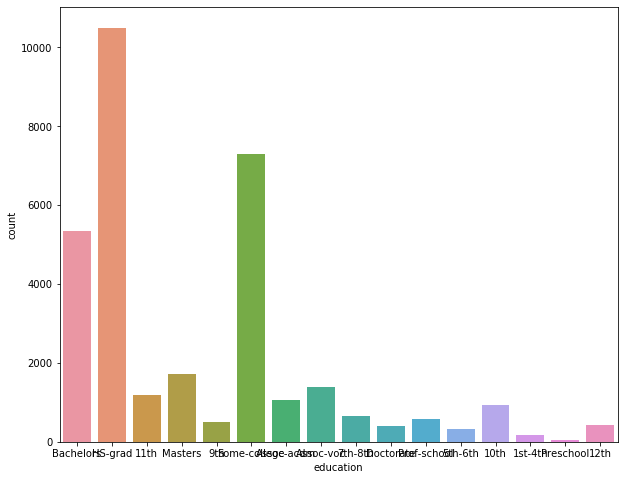

In [9]:
import seaborn as sns
sns.countplot(x='education', data=data)

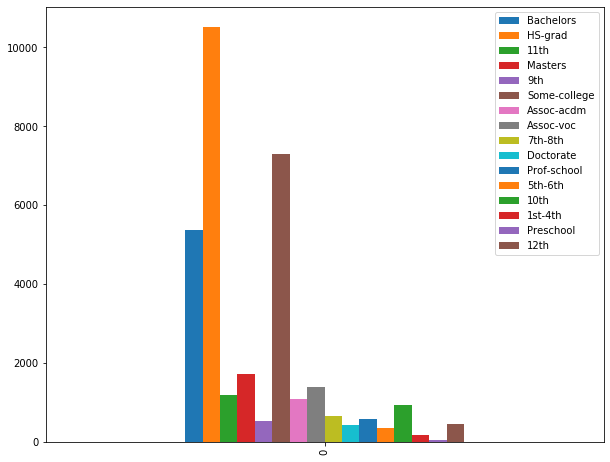

In [10]:
uniq_col = data.education.unique()
dic_col = {}

for col in uniq_col:
    n = data[data['education'] == col]
    dic_col[col] = [len(n)]

educ_df = pd.DataFrame(dic_col)

educ_df.plot.bar();

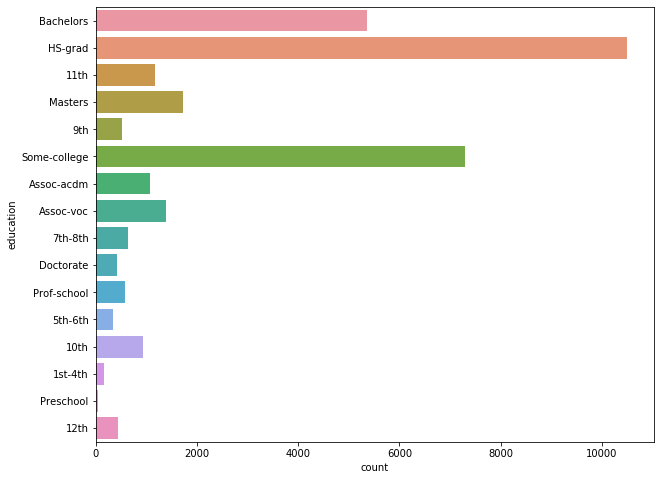

In [17]:
# proposal
sns.countplot(y='education', data=data)

**5. Каковы средние значения и среднеквадратичные отклонения возраста тех, кто получает более 50K в год (признак 'salary') и тех, кто получает менее 50K в год?**

In [73]:
{'mean <=50': data[data['salary'] == '<=50K']['age'].mean(), 
 'std <=50': data[data['salary'] == '<=50K']['age'].std(), 
 'mean >50': data[data['salary'] == '>50K']['age'].mean(), 
 'std >50': data[data['salary'] == '>50K']['age'].std()}

## PEP8 Length of python line - 100 symbols

{'mean <=50': 36.78373786407767,
 'std <=50': 14.02008849082488,
 'mean >50': 44.24984058155847,
 'std >50': 10.519027719851826}

In [24]:
# proposal

over50_age = data[data['salary'] == '>50K']['age']
under50_age = data[data['salary'] == '<=50K']['age']

print('over50:', over50_age.mean(), over50_age.std())
print('under50:', under50_age.mean(), under50_age.std())

over50: 44.24984058155847 10.519027719851826
under50: 36.78373786407767 14.02008849082488


**6. Правда ли, что люди, которые получают больше 50k, имеют как минимум высшее образование? (признак *education - Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters* или *Doctorate*)**

In [74]:
df = data[data['salary']=='>50K']
higher_degree = set(['Bachelors', 'Prof-school', 'Assoc-acdm', 'Assoc-voc', 'Masters','Doctorate'])
education_filter = lambda education: education not in higher_degree
# education_filter = lambda education: education not in('Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters или Doctorate')
df[ df['education'].map(education_filter)]

# !!! why search across string is inefficient

data[data['salary']=='>50K']['education'].value_counts()

Bachelors       2221
HS-grad         1675
Some-college    1387
Masters          959
Prof-school      423
Assoc-voc        361
Doctorate        306
Assoc-acdm       265
10th              62
11th              60
7th-8th           40
12th              33
9th               27
5th-6th           16
1st-4th            6
Name: education, dtype: int64

**7. Выведите статистику возраста для каждой расы (признак *race*) и каждого пола. Используйте *groupby* и *describe*. Найдите таким образом максимальный возраст мужчин расы *Amer-Indian-Eskimo*.**

In [25]:
# you may group by 2 and more columns

data.groupby(['race', 'sex']).describe()['age']

count       mean        std   min   25%   50%  \
race               sex                                                       
Amer-Indian-Eskimo Female    119.0  37.117647  13.114991  17.0  27.0  36.0   
                   Male      192.0  37.208333  12.049563  17.0  28.0  35.0   
Asian-Pac-Islander Female    346.0  35.089595  12.300845  17.0  25.0  33.0   
                   Male      693.0  39.073593  12.883944  18.0  29.0  37.0   
Black              Female   1555.0  37.854019  12.637197  17.0  28.0  37.0   
                   Male     1569.0  37.682600  12.882612  17.0  27.0  36.0   
Other              Female    109.0  31.678899  11.631599  17.0  23.0  29.0   
                   Male      162.0  34.654321  11.355531  17.0  26.0  32.0   
White              Female   8642.0  36.811618  14.329093  17.0  25.0  35.0   
                   Male    19174.0  39.652498  13.436029  17.0  29.0  38.0   

                             75%   max  
race               sex                  
Amer-Indian-Eskimo Female  46.00  80.0  
                   Male    45.00  82.0  
Asian-Pac-Islander Female  43.75  75.0  
                   Male    46.00  90.0  
Black              Female  46.00  90.0  
                   Male    46.00  90.0  
Other              Female  39.00  74.0  
                   Male    42.00  77.0  
White              Female  46.00  90.0  
                   Male    49.00  90.0

In [40]:
data.groupby(['sex']).describe()['age']

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
Female,10771.0,36.858230,14.013697,17.0,25.0,35.0,46.0,90.0
Male,21790.0,39.433547,13.370630,17.0,29.0,38.0,48.0,90.0


In [290]:
data[(data['sex'] == 'Male') & (data['race'] == 'Amer-Indian-Eskimo')]['age'].max()

82

**8. Среди кого больше доля зарабатывающих много (>50K): среди женатых или холостых мужчин (признак *marital-status*)? Женатыми считаем тех, у кого *marital-status* начинается с *Married* (Married-civ-spouse, Married-spouse-absent или Married-AF-spouse), остальных считаем холостыми.**

In [360]:
maried = data[data['marital-status'].map(lambda x: 'Married' in x)]
unmaried = data[data['marital-status'].map(lambda x: 'Married' not in x)]

print('maried', maried[maried['salary'] == '>50K'].count()[0])
print('unmaried', unmaried[unmaried['salary'] == '>50K'].count()[0])

## Wrong. 
# 1.Filter criteria is not correct.
# 2. Stats is incorrect

maried 6736
unmaried 1105


In [39]:
pd.crosstab?

In [76]:
# proposal

# data['marital-status'].unique()
# data['salary'].unique()

def is_married(status):
    return status in {'Married-civ-spouse', 'Married-spouse-absent', 'Married-AF-spouse'}

# def earns_a_lot(salary):
#     return salary == '>50K'

stats = data[['marital-status', 'salary']].copy()
stats['is_married'] = stats['marital-status'].map(is_married)
# stats['earns_a_lot'] = stats['salary'].map(earns_a_lot)
stats.drop(columns=['marital-status'], inplace=True)

pd.crosstab(index=stats['is_married'], columns=stats['salary'], 
            values=stats['salary'], 
            aggfunc=pd.Series.count,
            margins=True,
            normalize=True)

# sns.countplot(stats['is_married'], hue=stats['salary']);

salary,<=50K,>50K,All
is_married,,,
False,0.492583,0.033936,0.526519
True,0.266607,0.206873,0.473481
All,0.759190,0.240810,1.000000


**9. Какое максимальное число часов человек работает в неделю (признак *hours-per-week*)? Сколько людей работают такое количество часов и каков среди них процент зарабатывающих много?**

In [28]:
print(data['hours-per-week'].max())
print(len(data[data['hours-per-week'] == data['hours-per-week'].max()]))
len(data[(data['hours-per-week'] == data['hours-per-week'].max()) & (data['salary'] == '>50K')]) / len(data[data['hours-per-week'] == data['hours-per-week'].max()])

# not sure if I understood those numbers correctly

99
85


0.29411764705882354

In [26]:
# proposal
hpw_max = data['hours-per-week'].max()
print('hours per week max:', hpw_max)

hpw_max_people = data[data['hours-per-week'] == hpw_max]
print('hours per week max work,  people:', len(hpw_max_people))

hpw_max_over50k = hpw_max_people[hpw_max_people['salary'] == '>50K']
print('over 50K:', 
        len(hpw_max_over50k)/len(hpw_max_people))

hours per week max: 99
hours per week max work,  people: 85
over 50K: 0.29411764705882354
